<a href="https://colab.research.google.com/github/alexis1199/ESTADISTICA/blob/main/Problemas_Un_Factor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Analiza los siguientes diseños experimentales, e intenta sacar el máximo valor a la información. Verifica los supuestos (linealidad, homscedasticidad e independencia), puedes apoyarte en [este documento](https://colab.research.google.com/drive/1VDWeVo0mZluvDAFcr5Vq6n3EdqW3EZaG?usp=sharing). Aplica una prueba post-hoc en caso que sea necesario. Redacta una conclusión y una recomendación para las personas que recolectaron los datos.

1. **Comparación de cuatro métodos de ensamble:** Un equipo de mejora investiga el efecto de cuatro métodos de ensamble A, B, C y D, sobre el tiempo de ensamble en minutos. En primera instancia, la estrategia experimental es aplicar cuatro veces los cuatro métodos de ensamble en orden completamente aleatorio (las 16 pruebas en orden aleatorio). Los tiempos de ensamble obtenidos se muestran en la tabla 3.1. Si se usa el diseño completamente al azar (DCA), se supone que, además del método de ensamble, no existe ningún otro factor que influya de manera significativa sobre la variable de respuesta (tiempo de ensamble).

| Método de ensamble | A  | B  | C  | D  |
|--------------------|----|----|----|----|
|                    | 6  | 7  | 11 | 10 |
|                    | 8  | 9  | 16 | 12 |
|                    | 7  | 10 | 11 | 11 |
|                    | 8  | 8  | 13 | 9  |


In [2]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
metodo,tiempo
A,6
A,8
A,7
A,8
B,7
B,9
B,10
B,8
C,11
C,16
C,11
C,13
D,10
D,12
D,11
D,9
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# De aquí en adelante, ya se lo dejo a ustedes.

,metodo,tiempo
0,A,6
1,A,8
2,A,7
3,A,8
4,B,7
5,B,9
6,B,10
7,B,8
8,C,11
9,C,16


In [8]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['metodo'] == 'A']['tiempo'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'B']['tiempo'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'C']['tiempo'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['metodo'] == 'D']['tiempo'], "Grupo D", nivel_de_significancia)
# BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.8634
Valor p: 0.2725
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.8481
Valor p: 0.2200
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.


In [9]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['metodo'] == 'A']['tiempo'],
    df[df['metodo'] == 'B']['tiempo'],
    df[df['metodo'] == 'C']['tiempo'],
    df[df['metodo'] == 'D']['tiempo']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 3.197177823007627
Valor p: 0.3622118535713045
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


In [10]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['metodo'] == 'A']['tiempo'],
    df[df['metodo'] == 'B']['tiempo'],
    df[df['metodo'] == 'C']['tiempo'],
    df[df['metodo'] == 'D']['tiempo']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
F-Estadístico: 9.42
Valor p: 0.00177

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B     1.25 0.6805 -2.0416 4.5416  False
     A      C      5.5 0.0016  2.2084 8.7916   True
     A      D     3.25 0.0533 -0.0416 6.5416  False
     B      C     4.25  0.011  0.9584 7.5416   True
     B      D      2.0 0.3181 -1.2916 5.2916  False
     C      D    -2.25 0.2309 -5.5416 1.0416  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

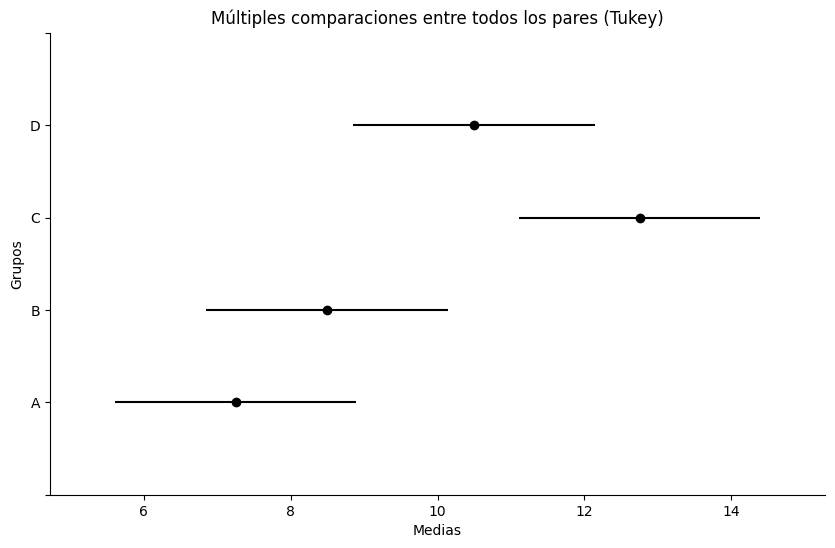

In [11]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['metodo'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
# BRIAN ALEXIS VILLALOBOS DE LOERA

# Conclusión:
Los métodos de ensamble no tienen el mismo rendimiento. El método C resultó ser el más lento, mientras que A y B tuvieron tiempos más cortos y similares.

# Recomendación:
Es recomendable evitar el uso del método C para mejorar la eficiencia. Además, seguir usando un diseño aleatorio ayuda a que los resultados sean confiables.

2. **Comparación de cuatro tipos de cuero:** Un fabricante de calzado desea mejorar la calidad de las suelas, las cuales se pueden hacer con uno de los cuatro tipos de cuero A, B, C y D disponibles en el mercado. Para ello, prueba los cueros con una máquina que hace pasar los zapatos por una superficie abrasiva; la suela de éstos se desgasta al pasarla por dicha superficie. Como criterio de desgaste se usa la pérdida de peso después de un número fijo de ciclos. Se prueban en orden aleatorio 24 zapatos, seis de cada tipo de cuero. Al hacer las pruebas en orden completamente al azar se evitan sesgos y las mediciones en un tipo de cuero resultan independientes de las demás. Los datos (en miligramos) sobre el desgaste de cada tipo de cuero se muestran en la tabla.

| Tipo de cuero | Observaciones                  | Promedio |
|---------------|--------------------------------|----------|
| A             | 264, 260, 258, 241, 262, 255 | 256.7    |
| B             | 208, 220, 216, 200, 213, 206 | 209.8    |
| C             | 220, 263, 219, 225, 230, 228 | 230.8    |
| D             | 217, 226, 215, 227, 220, 222 | 220.7    |


In [12]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
tipo_de_cuero,observaciones,promedio
A,264,256.7
A,260,256.7
A,258,256.7
A,241,256.7
A,262,256.7
A,255,256.7
B,208,209.8
B,220,209.8
B,216,209.8
B,200,209.8
B,213,209.8
B,206,209.8
C,220,230.8
C,263,230.8
C,219,230.8
C,225,230.8
C,230,230.8
C,228,230.8
D,217,220.7
D,226,220.7
D,215,220.7
D,227,220.7
D,220,220.7
D,222,220.7
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# BRIAN ALEXIS VILLALOBOS DE LOERA

,tipo_de_cuero,observaciones,promedio
0,A,264,256.7
1,A,260,256.7
2,A,258,256.7
3,A,241,256.7
4,A,262,256.7
5,A,255,256.7
6,B,208,209.8
7,B,220,209.8
8,B,216,209.8
9,B,200,209.8


In [13]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['tipo_de_cuero'] == 'A']['observaciones'], "Grupo A", nivel_de_significancia)
prueba_shapiro(df[df['tipo_de_cuero'] == 'B']['observaciones'], "Grupo B", nivel_de_significancia)
prueba_shapiro(df[df['tipo_de_cuero'] == 'C']['observaciones'], "Grupo C", nivel_de_significancia)
prueba_shapiro(df[df['tipo_de_cuero'] == 'D']['observaciones'], "Grupo D", nivel_de_significancia)
# BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Grupo A:
Estadístico: 0.8348
Valor p: 0.1180
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo B:
Estadístico: 0.9847
Valor p: 0.9723
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C:
Estadístico: 0.7369
Valor p: 0.0148
Interpretación: Los datos no tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo D:
Estadístico: 0.9453
Valor p: 0.7017
Interpretación: Los datos tienen una distribución normal.


In [14]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['tipo_de_cuero'] == 'A']['observaciones'],
    df[df['tipo_de_cuero'] == 'B']['observaciones'],
    df[df['tipo_de_cuero'] == 'C']['observaciones'],
    df[df['tipo_de_cuero'] == 'D']['observaciones']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    # BRIAN  ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 10.695662686951092
Valor p: 0.013490686639784475
Rechazamos la hipótesis nula: Las varianzas no son iguales.


In [15]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['tipo_de_cuero'] == 'A']['observaciones'],
    df[df['tipo_de_cuero'] == 'B']['observaciones'],
    df[df['tipo_de_cuero'] == 'C']['observaciones'],
    df[df['tipo_de_cuero'] == 'D']['observaciones']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")
    # BRIAN A LEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
F-Estadístico: 22.76
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
     A      B -46.1667    0.0  -62.553 -29.7803   True
     A      C -25.8333 0.0014 -42.2197   -9.447   True
     A      D    -35.5    0.0 -51.8863 -19.1137   True
     B      C  20.3333 0.0118    3.947  36.7197   True
     B      D  10.6667 0.2926  -5.7197   27.053  False
     C      D  -9.6667 0.3743  -26.053   6.7197  False
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

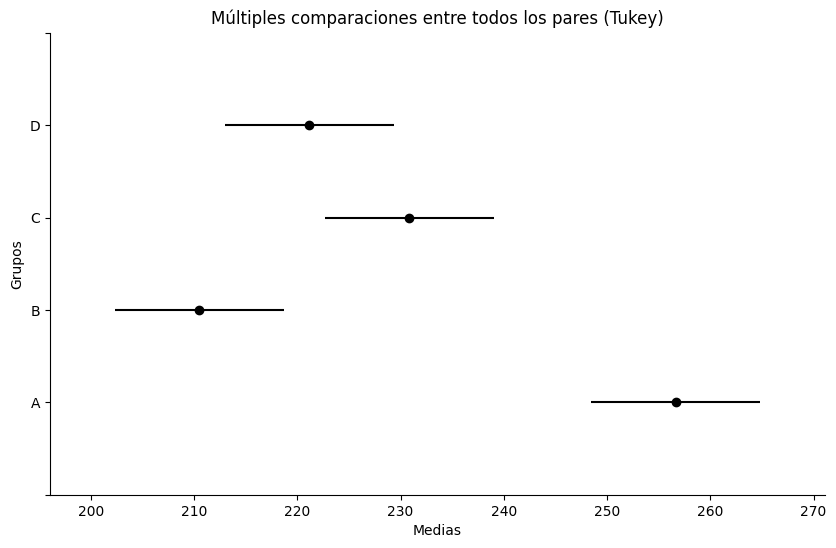

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['observaciones'], groups=df['tipo_de_cuero'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
# BRIAN ALEXIS VILLALOBOS DE LOERA

# Conclusión:
Se observaron diferencias claras en el desgaste según el tipo de cuero. El cuero A se desgasta más que los demás, mientras que el cuero B tiene el menor desgaste.

# Recomendación:
Conviene usar el cuero B para mejorar la resistencia del calzado. También se recomienda seguir probando con otros cueros del mercado para buscar aún mejores resultados.

3. En un centro de investigación se realiza un estudio para comparar varios tratamientos que, al aplicarse previamente a los frijoles crudos, reducen su tiempo de cocción. Estos tratamientos son a base de bicarbonato de sodio y cloruro de sodio o sal común. El primer tratamiento ($T_1$) es el de control, que consiste en no aplicar ningún tratamiento. El tratamiento $T_2$ es el remojo en agua con bicarbonato de sodio, el $T_3$ es remojar en agua con sal común y el $T_4$ es remojar en agua con una combinación de ambos ingredientes en proporciones iguales. La variable de respuesta es el tiempo de cocción en minutos. Los datos se muestran en la siguiente tabla:

| $T_1$ | $T_2$  | $T_3$  | $T_4$  |
|---------|-----|-----|-----|
| 213     | 76  | 57  | 84  |
| 214     | 85  | 67  | 82  |
| 204     | 74  | 55  | 85  |
| 208     | 78  | 64  | 92  |
| 212     | 82  | 61  | 87  |
| 200     | 75  | 63  | 79  |
| 207     | 82  | 63  | 90  |



In [17]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
tratamiento,tiempo
T1,213
T1,214
T1,204
T1,208
T1,212
T1,200
T1,207
T2,76
T2,85
T2,74
T2,78
T2,82
T2,75
T2,82
T3,57
T3,67
T3,55
T3,64
T3,61
T3,63
T3,63
T4,84
T4,82
T4,85
T4,92
T4,87
T4,79
T4,90
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# BRIAN ALEXIS VILLALOBOS DE LOERA

,tratamiento,tiempo
0,T1,213
1,T1,214
2,T1,204
3,T1,208
4,T1,212
5,T1,200
6,T1,207
7,T2,76
8,T2,85
9,T2,74


In [18]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['tratamiento'] == 'T1']['tiempo'], "Grupo T1", nivel_de_significancia)
prueba_shapiro(df[df['tratamiento'] == 'T2']['tiempo'], "Grupo T2", nivel_de_significancia)
prueba_shapiro(df[df['tratamiento'] == 'T3']['tiempo'], "Grupo T3", nivel_de_significancia)
prueba_shapiro(df[df['tratamiento'] == 'T4']['tiempo'], "Grupo T4", nivel_de_significancia)
# BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Grupo T1:
Estadístico: 0.9387
Valor p: 0.6269
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo T2:
Estadístico: 0.9200
Valor p: 0.4697
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo T3:
Estadístico: 0.9413
Valor p: 0.6506
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo T4:
Estadístico: 0.9847
Valor p: 0.9793
Interpretación: Los datos tienen una distribución normal.


In [19]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['tratamiento'] == 'T1']['tiempo'],
    df[df['tratamiento'] == 'T2']['tiempo'],
    df[df['tratamiento'] == 'T3']['tiempo'],
    df[df['tratamiento'] == 'T4']['tiempo']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 1.1516129957961094
Valor p: 0.7646313339073795
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


In [20]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['tratamiento'] == 'T1']['tiempo'],
    df[df['tratamiento'] == 'T2']['tiempo'],
    df[df['tratamiento'] == 'T3']['tiempo'],
    df[df['tratamiento'] == 'T4']['tiempo']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
F-Estadístico: 1558.97
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
    T1     T2 -129.4286    0.0 -136.0757 -122.7815   True
    T1     T3 -146.8571    0.0 -153.5043   -140.21   True
    T1     T4 -122.7143    0.0 -129.3614 -116.0672   True
    T2     T3  -17.4286    0.0  -24.0757  -10.7815   True
    T2     T4    6.7143 0.0471    0.0672   13.3614   True
    T3     T4   24.1429    0.0   17.4957     30.79   True
---------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

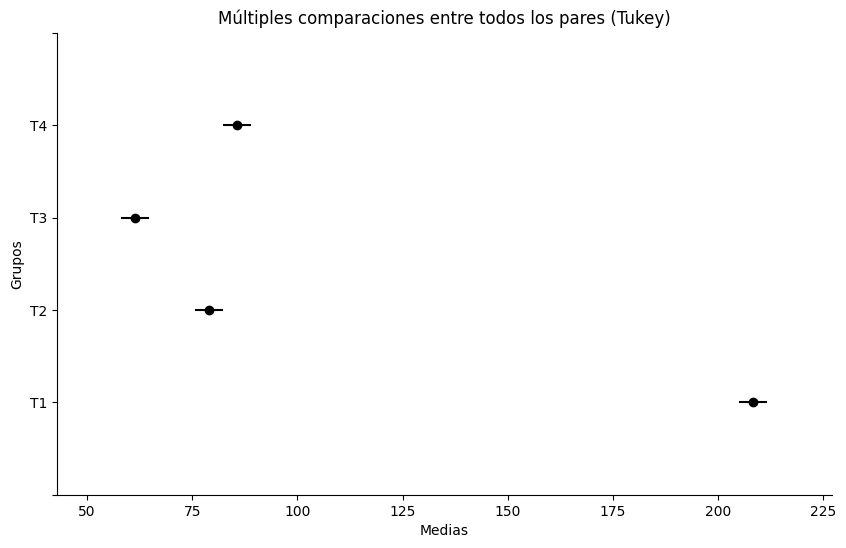

In [21]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['tiempo'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
# BRIAN ALEXIS VILLALOBOS DE LOERA

# Conclusión:
Los tratamientos con sal, bicarbonato o ambos ayudan a reducir mucho el tiempo de cocción. El grupo sin tratamiento tarda más en cocinarse.

# Recomendación:
Se recomienda aplicar tratamientos con sal o bicarbonato al remojar los frijoles. También sería útil probar diferentes concentraciones para ver si se puede mejorar aún más.

4. Para estudiar la confiabilidad de ciertos tableros electrónicos para carros, se someten a un envejecimiento acelerado durante 100 horas a determinada temperatura, y como variable de interés se mide la intensidad de corriente que circula entre dos puntos, cuyos valores aumentan con el deterioro. Se probaron 20 módulos repartidos de manera equitativa en cinco temperaturas y los resultados obtenidos fueron los siguientes:

| 20°C | 40°C | 60°C | 80°C | 100°C |
|------|------|------|------|-------|
| 15   | 17   | 23   | 28   | 45    |
| 18   | 21   | 19   | 32   | 51    |
| 13   | 11   | 25   | 34   | 57    |
| 12   | 16   | 22   | 31   | 48    |


In [22]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
temperatura,valor
20°C,15
20°C,18
20°C,13
20°C,12
40°C,17
40°C,21
40°C,11
40°C,16
60°C,23
60°C,19
60°C,25
60°C,22
80°C,28
80°C,32
80°C,34
80°C,31
100°C,45
100°C,51
100°C,57
100°C,48
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# BRIAN ALEXIS VILLALOBOS DE LOERA

,temperatura,valor
0,20°C,15
1,20°C,18
2,20°C,13
3,20°C,12
4,40°C,17
5,40°C,21
6,40°C,11
7,40°C,16
8,60°C,23
9,60°C,19


In [23]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['temperatura'] == '20°C']['valor'], "Grupo 1", nivel_de_significancia)
prueba_shapiro(df[df['temperatura'] == '40°C']['valor'], "Grupo 2", nivel_de_significancia)
prueba_shapiro(df[df['temperatura'] == '60°C']['valor'], "Grupo 3", nivel_de_significancia)
prueba_shapiro(df[df['temperatura'] == '80°C']['valor'], "Grupo 4", nivel_de_significancia)
prueba_shapiro(df[df['temperatura'] == '100°C']['valor'], "Grupo 5", nivel_de_significancia)
# BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Grupo 1:
Estadístico: 0.9456
Valor p: 0.6889
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 2:
Estadístico: 0.9763
Valor p: 0.8800
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 3:
Estadístico: 0.9815
Valor p: 0.9109
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 4:
Estadístico: 0.9815
Valor p: 0.9109
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 5:
Estadístico: 0.9714
Valor p: 0.8500
Interpretación: Los datos tienen una distribución normal.


In [24]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['temperatura'] == '20°C']['valor'],
    df[df['temperatura'] == '40°C']['valor'],
    df[df['temperatura'] == '60°C']['valor'],
    df[df['temperatura'] == '80°C']['valor'],
    df[df['temperatura'] == '100°C']['valor']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 5.716341814164856
Valor p: 0.22135717752806
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


In [25]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['temperatura'] == '20°C']['valor'],
    df[df['temperatura'] == '40°C']['valor'],
    df[df['temperatura'] == '60°C']['valor'],
    df[df['temperatura'] == '80°C']['valor'],
    df[df['temperatura'] == '100°C']['valor']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
F-Estadístico: 68.05
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj   lower    upper   reject
------------------------------------------------------
 100°C   20°C   -35.75    0.0 -43.4801 -28.0199   True
 100°C   40°C    -34.0    0.0 -41.7301 -26.2699   True
 100°C   60°C    -28.0    0.0 -35.7301 -20.2699   True
 100°C   80°C    -19.0    0.0 -26.7301 -11.2699   True
  20°C   40°C     1.75 0.9535  -5.9801   9.4801  False
  20°C   60°C     7.75 0.0493   0.0199  15.4801   True
  20°C   80°C    16.75 0.0001   9.0199  24.4801   True
  40°C   60°C      6.0 0.1696  -1.7301  13.7301  False
  40°C   80°C     15.0 0.0002   7.2699  22.7301   True
  60°C   80°C      9.0 0.0191   1.2699  16.7301   True
------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

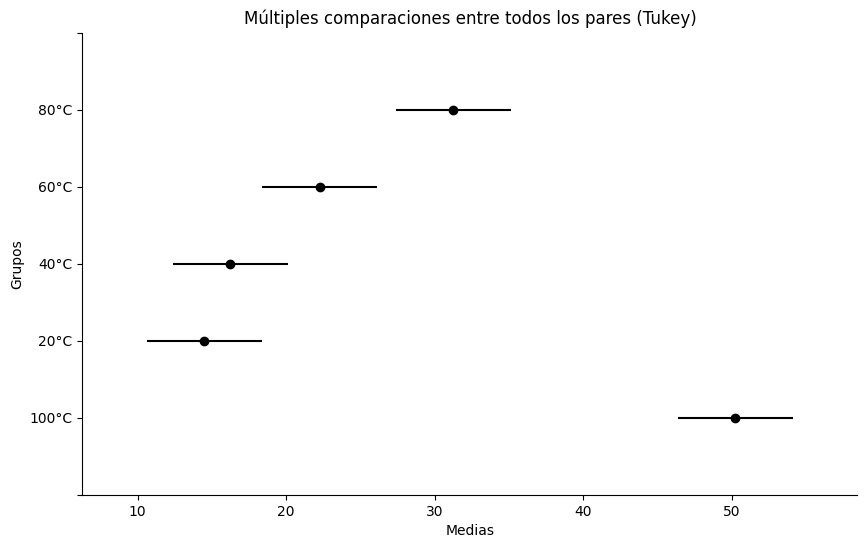

In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['valor'], groups=df['temperatura'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
# BRIAN ALEXIS VILLALOBOS DE LOERA

# Conclusión:
A mayor temperatura, más corriente circula en los tableros, lo que indica más deterioro. La diferencia entre temperaturas es clara.

# Recomendación:
Evitar el uso prolongado de los tableros a altas temperaturas. Se sugiere hacer más pruebas con otras duraciones o tipos de tableros.

5. En una empresa de manufactura se propone un tratamiento para reducir el porcentaje de productos defectuosos. Para validar esta propuesta se diseñó un experimento en el que se producía con o sin la propuesta de mejora. Cada corrida experimental consistió en producir un lote y la variable de respuesta es el porcentaje de producto defectuoso. Se hicieron 25 réplicas para cada tratamiento. Los datos obtenidos se muestran a continuación:

| Tratamiento     | Porcentaje de producto defectuoso                                     |
|-----------------|----------------------------------------------------------------------|
| Con tratam.     | 5.3, 4.0, 4.0, 4.0, 2.6, 2.1, 5.1, 4.1, 4.1, 3.2, 5.1, 2.2, 4.1     |
| Sin tratam.     | 8.0, 13.2, 7.2, 8.2, 9.1, 6.7, 12.6, 16.3, 9.2, 6.4, 7.2, 17.2, 12.3 |


In [28]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
tratamiento,porcentaje_de_producto_defectuoso
Con_tratam.,5.3
Con_tratam.,4.0
Con_tratam.,4.0
Con_tratam.,4.0
Con_tratam.,2.6
Con_tratam.,2.1
Con_tratam.,5.1
Con_tratam.,4.1
Con_tratam.,4.1
Con_tratam.,3.2
Con_tratam.,5.1
Con_tratam.,2.2
Con_tratam.,4.1
Sin_tratam.,8.0
Sin_tratam.,13.2
Sin_tratam.,7.2
Sin_tratam.,8.2
Sin_tratam.,9.1
Sin_tratam.,6.7
Sin_tratam.,12.6
Sin_tratam.,16.3
Sin_tratam.,9.2
Sin_tratam.,6.4
Sin_tratam.,7.2
Sin_tratam.,17.2
Sin_tratam.,12.3
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# BRIAN ALEXIS VILLALOBOS DE LOERA

,tratamiento,porcentaje_de_producto_defectuoso
0,Con_tratam.,5.3
1,Con_tratam.,4.0
2,Con_tratam.,4.0
3,Con_tratam.,4.0
4,Con_tratam.,2.6
5,Con_tratam.,2.1
6,Con_tratam.,5.1
7,Con_tratam.,4.1
8,Con_tratam.,4.1
9,Con_tratam.,3.2


In [29]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['tratamiento'] == 'Con_tratam.']['porcentaje_de_producto_defectuoso'], "Grupo Con_tratam.", nivel_de_significancia)
prueba_shapiro(df[df['tratamiento'] == 'Sin_tratam.']['porcentaje_de_producto_defectuoso'], "Grupo Sin_tratam.", nivel_de_significancia)
# BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Grupo Con_tratam.:
Estadístico: 0.8991
Valor p: 0.1299
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo Sin_tratam.:
Estadístico: 0.8757
Valor p: 0.0624
Interpretación: Los datos tienen una distribución normal.


In [30]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['tratamiento'] == 'Con_tratam.']['porcentaje_de_producto_defectuoso'],
    df[df['tratamiento'] == 'Sin_tratam.']['porcentaje_de_producto_defectuoso'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 14.624218793568684
Valor p: 0.0001312173560465191
Rechazamos la hipótesis nula: Las varianzas no son iguales.


In [32]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['tratamiento'] == 'Con_tratam.']['porcentaje_de_producto_defectuoso'],
    df[df['tratamiento'] == 'Sin_tratam.']['porcentaje_de_producto_defectuoso'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
F-Estadístico: 37.10
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1      group2   meandiff p-adj lower  upper reject
----------------------------------------------------------
Con_tratam. Sin_tratam.   6.4385   0.0 4.2569  8.62   True
----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

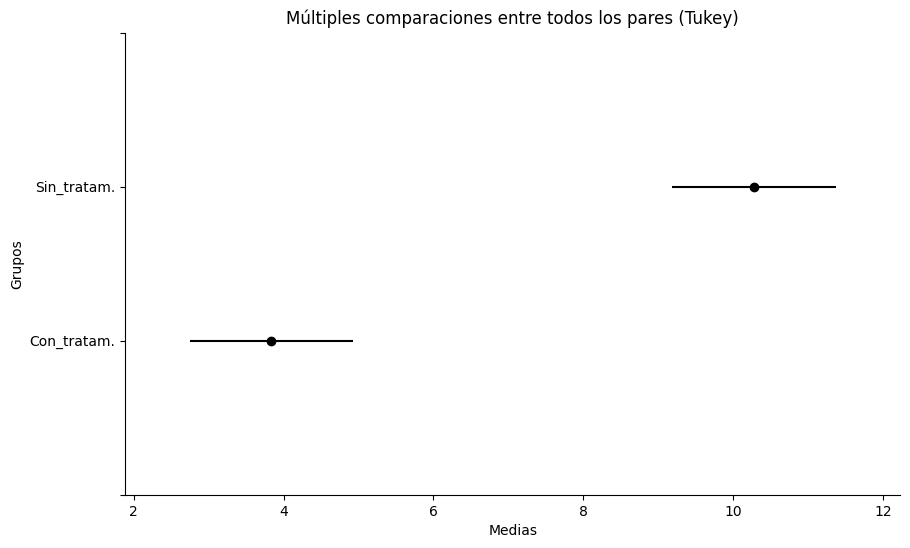

In [33]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_producto_defectuoso'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
# BRIAN ALEXIS VILLALOBOS DE LOERA

# Conclusión:
El tratamiento ayuda a reducir el porcentaje de productos defectuosos. La diferencia entre usarlo o no es muy notable.

# Recomendación:
Se aconseja usar el tratamiento de mejora en toda la producción. También sería útil observar si el efecto se mantiene a largo plazo.

6. Una compañía farmacéutica desea evaluar el efecto que tiene la cantidad de almidón en la dureza de las tabletas. Se decidió producir lotes con una cantidad determinada de almidón, y que las cantidades de almidón a aprobar fueran 2%, 5% y 10%. La variable de respuesta sería el promedio de la dureza de 20 tabletas de cada lote. Se hicieron 4 réplicas por tratamiento y se obtuvieron los siguientes resultados:

| % de almidón | Dureza               |
|--------------|----------------------|
| 2            | 4.3, 5.2, 4.8, 4.5  |
| 5            | 6.5, 7.3, 6.9, 6.1  |
| 10           | 9.0, 7.8, 8.5, 8.1  |


In [34]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
%_de_almidon,dureza
2%,4.3
2%,5.2
2%,4.8
2%,4.5
5%,6.5
5%,7.3
5%,6.9
5%,6.1
10%,9.0
10%,7.8
10%,8.5
10%,8.1
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# BRIAN ALEXIS VILLALOBOS DE LOERA

,%_de_almidon,dureza
0,2%,4.3
1,2%,5.2
2,2%,4.8
3,2%,4.5
4,5%,6.5
5,5%,7.3
6,5%,6.9
7,5%,6.1
8,10%,9.0
9,10%,7.8


In [35]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['%_de_almidon'] == '2%']['dureza'], "Grupo 2", nivel_de_significancia)
prueba_shapiro(df[df['%_de_almidon'] == '5%']['dureza'], "Grupo 5", nivel_de_significancia)
prueba_shapiro(df[df['%_de_almidon'] == '10%']['dureza'], "Grupo 10", nivel_de_significancia)
# BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Grupo 2:
Estadístico: 0.9713
Valor p: 0.8497
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 5:
Estadístico: 0.9929
Valor p: 0.9719
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo 10:
Estadístico: 0.9807
Valor p: 0.9058
Interpretación: Los datos tienen una distribución normal.


In [36]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['%_de_almidon'] == '2%']['dureza'],
    df[df['%_de_almidon'] == '5%']['dureza'],
    df[df['%_de_almidon'] == '10%']['dureza']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 0.25398027627307607
Valor p: 0.8807423583152111
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


In [37]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['%_de_almidon'] == '2%']['dureza'],
    df[df['%_de_almidon'] == '5%']['dureza'],
    df[df['%_de_almidon'] == '10%']['dureza'],

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
F-Estadístico: 58.10
Valor p: 0.00001

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   10%     2%    -3.65    0.0 -4.5968 -2.7032   True
   10%     5%    -1.65 0.0023 -2.5968 -0.7032   True
    2%     5%      2.0 0.0006  1.0532  2.9468   True
----------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

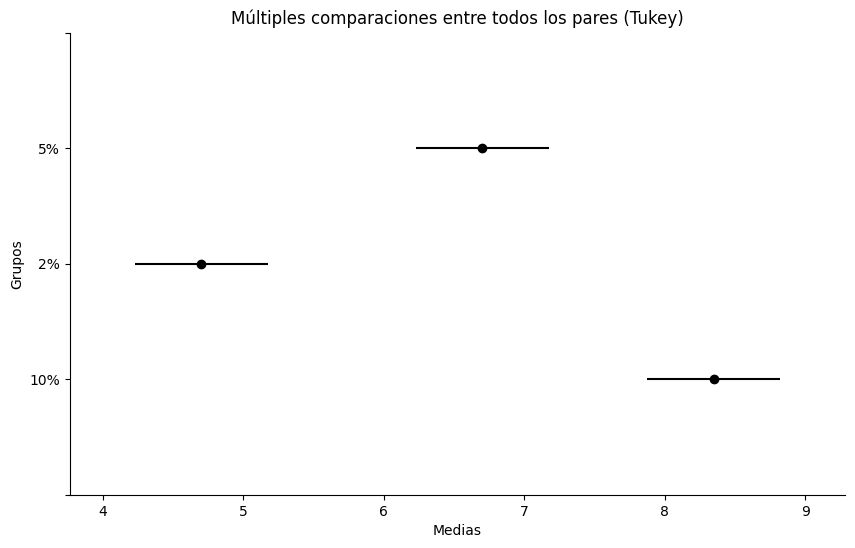

In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['dureza'], groups=df['%_de_almidon'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
# BRIAN ALEXIS VILLALOBOS DE LOERA

# Conclusión:
Se encontró que al aumentar el porcentaje de almidón, la dureza de las tabletas también aumenta. Las diferencias entre grupos son claras.

# Recomendación:
Usar un porcentaje mayor de almidón si se busca mayor dureza. Sería bueno estudiar si hay un punto donde esto deje de ser beneficioso.

7. Los datos que se presentan enseguida son rendimientos en toneladas por hectárea de un pasto con tres niveles de fertilización nitrogenada. El diseño fue completamente aleatorizado, con cinco repeticiones por tratamiento.

| Niveles de nitrógeno | Rendimientos (ton/ha)       |
|-----------------------|----------------------------|
| 1                     | 14.823, 14.676, 14.720, 14.5141, 15.065 |
| 2                     | 25.151, 25.401, 25.131, 25.031, 25.267 |
| 3                     | 32.605, 32.460, 32.256, 32.669, 32.111 |


In [39]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
niveles_de_nitrógeno,rendimientos
N1,14.823
N1,14.676
N1,14.720
N1,14.5141
N1,15.065
N2,25.151
N2,25.401
N2,25.131
N2,25.031
N2,25.267
N3,32.605
N3,32.460
N3,32.256
N3,32.669
N3,32.111
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# BRIAN ALEXIS VILLALOBOS DE LOERA

,niveles_de_nitrógeno,rendimientos
0,N1,14.8230
1,N1,14.6760
2,N1,14.7200
3,N1,14.5141
4,N1,15.0650
5,N2,25.1510
6,N2,25.4010
7,N2,25.1310
8,N2,25.0310
9,N2,25.2670


In [40]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['niveles_de_nitrógeno'] == 'N1']['rendimientos'], "Grupo N1", nivel_de_significancia)
prueba_shapiro(df[df['niveles_de_nitrógeno'] == 'N2']['rendimientos'], "Grupo N2", nivel_de_significancia)
prueba_shapiro(df[df['niveles_de_nitrógeno'] == 'N3']['rendimientos'], "Grupo N3", nivel_de_significancia)
# BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Grupo N1:
Estadístico: 0.9710
Valor p: 0.8819
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo N2:
Estadístico: 0.9647
Valor p: 0.8402
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo N3:
Estadístico: 0.9406
Valor p: 0.6701
Interpretación: Los datos tienen una distribución normal.


In [41]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['niveles_de_nitrógeno'] == 'N1']['rendimientos'],
    df[df['niveles_de_nitrógeno'] == 'N2']['rendimientos'],
    df[df['niveles_de_nitrógeno'] == 'N3']['rendimientos']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 0.8864989638874725
Valor p: 0.6419470329147967
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


In [42]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['niveles_de_nitrógeno'] == 'N1']['rendimientos'],
    df[df['niveles_de_nitrógeno'] == 'N2']['rendimientos'],
    df[df['niveles_de_nitrógeno'] == 'N3']['rendimientos'],

)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
F-Estadístico: 10131.62
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
    N1     N2  10.4366   0.0 10.1038 10.7694   True
    N1     N3  17.6606   0.0 17.3278 17.9934   True
    N2     N3    7.224   0.0  6.8912  7.5568   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

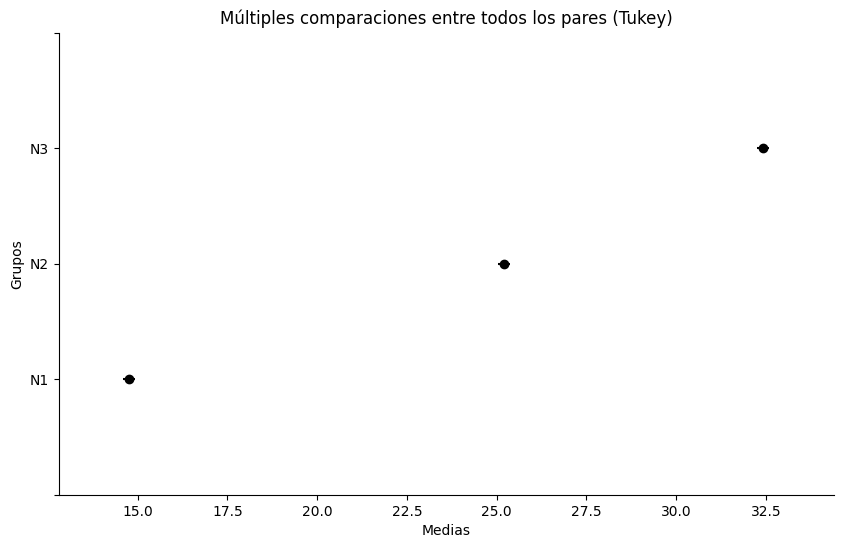

In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['rendimientos'], groups=df['niveles_de_nitrógeno'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
# BRIAN ALEXIS VILLALOBOS DE LOERA

# Conclusión:
A mayor nivel de nitrógeno, mayor es el rendimiento del pasto. Las diferencias entre los tres niveles son significativas.

# Recomendación:
Se recomienda usar niveles altos de nitrógeno para obtener más rendimiento. Sin embargo, es importante también considerar el costo y el impacto ambiental.

8. Un químico del departamento de desarrollo de un laboratorio farmacéutico desea conocer cómo influye el tipo de aglutinante utilizado en tabletas de ampicilina de 500 mg en el porcentaje de friabilidad; para ello, se eligen los siguientes aglutinantes: polivinilpirrolidona (PVP), carboximetilcelulosa sódica (CMC) y grenetina (Gre). Los resultados del diseño experimental son los siguientes:

| Aglutinante | % de friabilidad          |
|-------------|---------------------------|
| PVP         | 0.485, 0.250, 0.073, 0.205, 0.161 |
| CMC         | 9.64, 9.37, 9.53, 9.86, 9.79       |
| Gre         | 0.289, 0.275, 0.612, 0.152, 0.137  |


In [44]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
aglutinante,%_de_friabilidad
PVP,0.485
PVP,0.250
PVP,0.073
PVP,0.205
PVP,0.161
CMC,9.64
CMC,9.37
CMC,9.53
CMC,9.86
CMC,9.79
Gre,0.289
Gre,0.275
Gre,0.612
Gre,0.152
Gre,0.137
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# BRIAN ALEXIS VILLALOBOS DE LOERA

,aglutinante,%_de_friabilidad
0,PVP,0.485
1,PVP,0.250
2,PVP,0.073
3,PVP,0.205
4,PVP,0.161
5,CMC,9.640
6,CMC,9.370
7,CMC,9.530
8,CMC,9.860
9,CMC,9.790


In [45]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['aglutinante'] == 'PVP']['%_de_friabilidad'], "Grupo PVP", nivel_de_significancia)
prueba_shapiro(df[df['aglutinante'] == 'CMC']['%_de_friabilidad'], "Grupo CMC", nivel_de_significancia)
prueba_shapiro(df[df['aglutinante'] == 'Gre']['%_de_friabilidad'], "Grupo Gre", nivel_de_significancia)
# BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Grupo PVP:
Estadístico: 0.9147
Valor p: 0.4962
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo CMC:
Estadístico: 0.9679
Valor p: 0.8616
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo Gre:
Estadístico: 0.8313
Valor p: 0.1424
Interpretación: Los datos tienen una distribución normal.


In [46]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['aglutinante'] == 'PVP']['%_de_friabilidad'],
    df[df['aglutinante'] == 'CMC']['%_de_friabilidad'],
    df[df['aglutinante'] == 'Gre']['%_de_friabilidad'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 0.24372837838984224
Valor p: 0.8852685893786298
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


In [47]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['aglutinante'] == 'PVP']['%_de_friabilidad'],
    df[df['aglutinante'] == 'CMC']['%_de_friabilidad'],
    df[df['aglutinante'] == 'Gre']['%_de_friabilidad'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
F-Estadístico: 4420.97
Valor p: 0.00000

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
   CMC    Gre   -9.345   0.0 -9.6521 -9.0379   True
   CMC    PVP  -9.4032   0.0 -9.7103 -9.0961   True
   Gre    PVP  -0.0582  0.87 -0.3653  0.2489  False
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

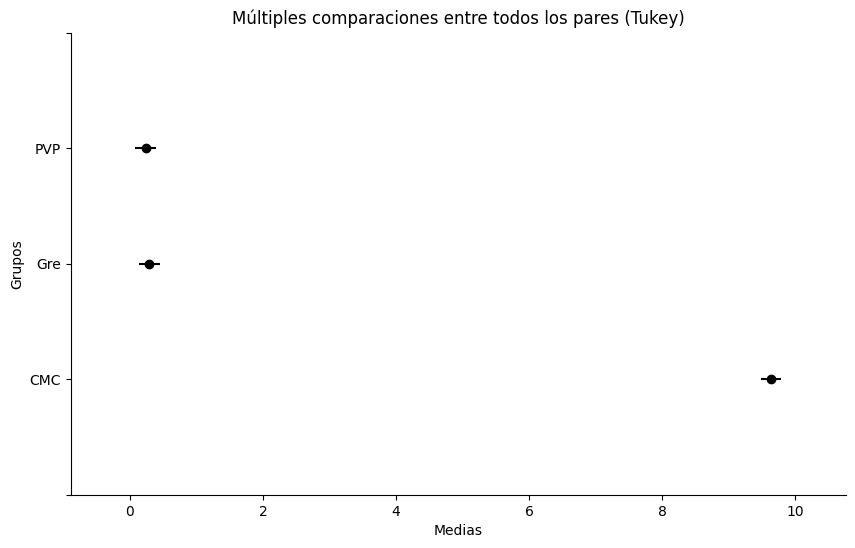

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['%_de_friabilidad'], groups=df['aglutinante'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
# BRIAN ALEXIS VILLALOBOS DE LOERA

# Conclusión:
El tipo de aglutinante afecta mucho el porcentaje de friabilidad. La CMC genera tabletas mucho más frágiles que las otras opciones.

# Recomendación:
Evitar el uso de CMC si se desea una tableta más resistente. Se sugiere investigar más sobre la combinación de aglutinantes para lograr mejores resultados.

9. Se cultivaron cuatro diferentes clonas de *agave tequilana* bajo un mismo esquema de manejo. Se quiere saber qué clona es la que responde mejor a dicho manejo, evaluando el nivel de respuesta con el porcentaje de azúcares reductores totales en base húmeda. Los datos se muestran a continuación:

| Clona | Porcentaje de azúcares reductores totales |
|-------|------------------------------------------|
| 1     | 8.69, 6.68, 6.83, 6.43, 10.30            |
| 2     | 8.00, 16.41, 12.43, 10.99, 15.53         |
| 3     | 17.39, 13.73, 15.62, 17.05, 15.42        |
| 4     | 10.37, 9.16, 8.83, 4.40, 10.38           |


In [49]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
clona,porcentaje_de_azuccares_reductores_totales
C1,8.69
C1,6.68
C1,6.83
C1,6.43
C1,10.3
C2,8.00
C2,16.41
C2,12.43
C2,10.99
C2,15.53
C3,17.39
C3,13.73
C3,15.62
C3,17.05
C3,15.42
C4,10.37
C4,9.16
C4,8.83
C4,4.40
C4,10.38
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# BRIAN ALEXIS VILLALOBOS DE LOERA

,clona,porcentaje_de_azuccares_reductores_totales
0,C1,8.69
1,C1,6.68
2,C1,6.83
3,C1,6.43
4,C1,10.30
5,C2,8.00
6,C2,16.41
7,C2,12.43
8,C2,10.99
9,C2,15.53


In [50]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['clona'] == 'C1']['porcentaje_de_azuccares_reductores_totales'], "Grupo C1", nivel_de_significancia)
prueba_shapiro(df[df['clona'] == 'C2']['porcentaje_de_azuccares_reductores_totales'], "Grupo C2", nivel_de_significancia)
prueba_shapiro(df[df['clona'] == 'C3']['porcentaje_de_azuccares_reductores_totales'], "Grupo C3", nivel_de_significancia)
prueba_shapiro(df[df['clona'] == 'C4']['porcentaje_de_azuccares_reductores_totales'], "Grupo C4", nivel_de_significancia)
# BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Grupo C1:
Estadístico: 0.8411
Valor p: 0.1679
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C2:
Estadístico: 0.9539
Valor p: 0.7648
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C3:
Estadístico: 0.9348
Valor p: 0.6293
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo C4:
Estadístico: 0.7772
Valor p: 0.0522
Interpretación: Los datos tienen una distribución normal.


In [51]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['clona'] == 'C1']['porcentaje_de_azuccares_reductores_totales'],
    df[df['clona'] == 'C2']['porcentaje_de_azuccares_reductores_totales'],
    df[df['clona'] == 'C3']['porcentaje_de_azuccares_reductores_totales'],
    df[df['clona'] == 'C4']['porcentaje_de_azuccares_reductores_totales']
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 3.2573646373855567
Valor p: 0.3536209118873371
No podemos rechazar la hipótesis nula: Las varianzas son iguales.


In [52]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['clona'] == 'C1']['porcentaje_de_azuccares_reductores_totales'],
    df[df['clona'] == 'C2']['porcentaje_de_azuccares_reductores_totales'],
    df[df['clona'] == 'C3']['porcentaje_de_azuccares_reductores_totales'],
    df[df['clona'] == 'C4']['porcentaje_de_azuccares_reductores_totales']
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
F-Estadístico: 12.33
Valor p: 0.00020

Conclusión: Hay diferencias significativas entre al menos dos grupos.


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    C1     C2    4.886 0.0237   0.575  9.197   True
    C1     C3    8.056 0.0003   3.745 12.367   True
    C1     C4    0.842 0.9428  -3.469  5.153  False
    C2     C3     3.17 0.1939  -1.141  7.481  False
    C2     C4   -4.044 0.0699  -8.355  0.267  False
    C3     C4   -7.214  0.001 -11.525 -2.903   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

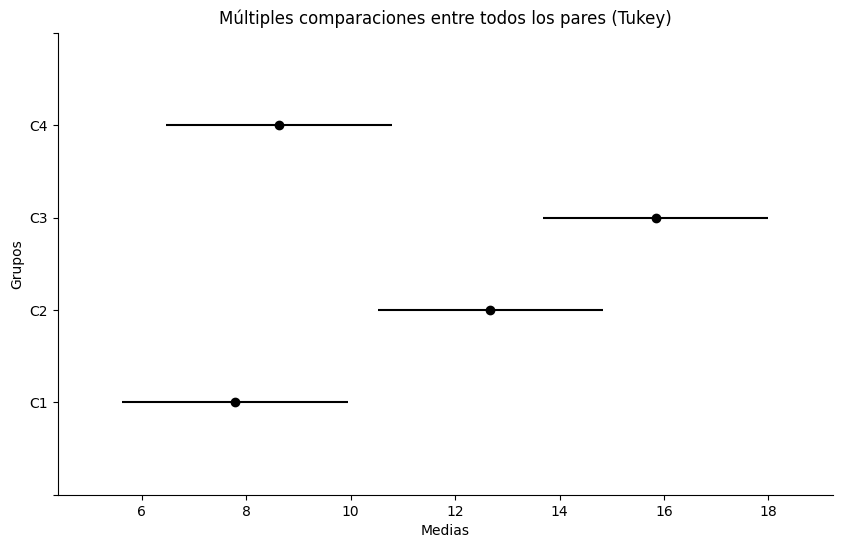

In [53]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['porcentaje_de_azuccares_reductores_totales'], groups=df['clona'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
# BRIAN ALEXIS VILLALOBOS DE LOERA

# Conclusión:
Se encontró que hay diferencias claras entre las clonas de agave en cuanto al porcentaje de azúcares. La clona 3 fue la que tuvo el mayor nivel de respuesta.

# Recomendación:
Se sugiere usar la clona 3 si se quiere obtener más azúcares. También sería bueno hacer más pruebas en diferentes condiciones para confirmar estos resultados.

10. Uno de los defectos que causan mayor desperdicio en la manufactura de discos ópticos compactos son los llamados “cometas”. Típicamente, se trata de una partícula que opone resistencia al fluido en la etapa de entintado. Se quiere comprobar de manera experimental la efectividad de un tratamiento de limpieza de partículas que está basado en fuerza centrípeta y aire ionizado. A 12 lotes de 50 CD se les aplica el tratamiento y a otros 12 lotes no se les aplica; en cada caso se mide el porcentaje de discos que presentan cometas, los resultados son los siguientes:

| Con tratamiento      | Sin tratamiento      |
|----------------------|----------------------|
| 5.30   | 8.02  |
| 4.03   | 13.18 |
| 4.00   | 7.15  |
| 2.56   | 9.11  |
| 5.06   | 8.23  |
| 4.06   | 16.3  |
| 2.08   | 9.20  |
| 4.03   | 6.35  |
| 2.04   | 7.15  |
| 1.18   | 8.66  |


In [55]:
# csv es un acrónimo de "comma separated values" o "valores separados por comas".
# Lo primero que hay que hacer es pasar estos datos a una tabla de valores crudos
# en formato csv. Recuerden el problema que fue usar espacios en el csv, por esta
# razón, evítenlos.

import pandas as pd
from io import StringIO

datos = '''
tratamiento,%
con_tratamiento,5.30
con_tratamiento,4.03
con_tratamiento,4.00
con_tratamiento,2.56
con_tratamiento,5.06
con_tratamiento,4.06
con_tratamiento,2.08
con_tratamiento,4.03
con_tratamiento,2.04
con_tratamiento,1.18
sin_tratamiento,8.02
sin_tratamiento,13.18
sin_tratamiento,7.15
sin_tratamiento,9.11
sin_tratamiento,8.23
sin_tratamiento,16.3
sin_tratamiento,9.20
sin_tratamiento,6.35
sin_tratamiento,7.15
sin_tratamiento,8.66
'''

df = pd.read_csv(StringIO(datos))
df.reset_index(drop=True, inplace=True)

df
# BRIAN ALEXIS VILLALOBOS DE LOERA

,tratamiento,%
0,con_tratamiento,5.30
1,con_tratamiento,4.03
2,con_tratamiento,4.00
3,con_tratamiento,2.56
4,con_tratamiento,5.06
5,con_tratamiento,4.06
6,con_tratamiento,2.08
7,con_tratamiento,4.03
8,con_tratamiento,2.04
9,con_tratamiento,1.18


In [56]:
# Prueba de Shapiro

from scipy.stats import shapiro
nivel_de_significancia = 0.05

# Función para realizar la prueba de Shapiro-Wilk y mostrar interpretación
# NO MODIFICAR
def prueba_shapiro(datos, nombre_grupo, nivel_de_significancia):
    stat, p = shapiro(datos)
    print(f"\nPrueba de Shapiro-Wilk para {nombre_grupo}:")
    print(f"Estadístico: {stat:.4f}")
    print(f"Valor p: {p:.4f}")
    if p > nivel_de_significancia:
        print("Interpretación: Los datos tienen una distribución normal.")
    else:
        print("Interpretación: Los datos no tienen una distribución normal.")

# Aplicar la prueba a cada grupo (parte modificable)
prueba_shapiro(df[df['tratamiento'] == 'con_tratamiento']['%'], "Grupo con_tratamiento", nivel_de_significancia)
prueba_shapiro(df[df['tratamiento'] == 'sin_tratamiento']['%'], "Grupo sin_tratamiento", nivel_de_significancia)
# BRIAN ALEXIS VILLALOBOS DE LOERA


Prueba de Shapiro-Wilk para Grupo con_tratamiento:
Estadístico: 0.9149
Valor p: 0.3162
Interpretación: Los datos tienen una distribución normal.

Prueba de Shapiro-Wilk para Grupo sin_tratamiento:
Estadístico: 0.8049
Valor p: 0.0166
Interpretación: Los datos no tienen una distribución normal.


In [57]:
from scipy.stats import bartlett
nivel_de_significancia = 0.05

# Aplicar la prueba de Bartlett
stat, p_value = bartlett(
    df[df['tratamiento'] == 'con_tratamiento']['%'],
    df[df['tratamiento'] == 'sin_tratamiento']['%'],
)

# Resultados
print("Estadístico de Bartlett:", stat)
print("Valor p:", p_value)

# Interpretación
if p_value < nivel_de_significancia:
    print("Rechazamos la hipótesis nula: Las varianzas no son iguales.")
else:
    print("No podemos rechazar la hipótesis nula: Las varianzas son iguales.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Estadístico de Bartlett: 4.970612361881678
Valor p: 0.02578151815286211
Rechazamos la hipótesis nula: Las varianzas no son iguales.


In [58]:
import scipy.stats as stats

nivel_de_significancia = 0.05

# Realizar ANOVA
anova_result = stats.f_oneway(
    df[df['tratamiento'] == 'con_tratamiento']['%'],
    df[df['tratamiento'] == 'sin_tratamiento']['%'],
)

# Interpretar los resultados
print("Resultados del ANOVA:")
print(f"F-Estadístico: {anova_result.statistic:.2f}")
print(f"Valor p: {anova_result.pvalue:.5f}\n")

if anova_result.pvalue < nivel_de_significancia:
    print("Conclusión: Hay diferencias significativas entre al menos dos grupos.")
else:
    print("Conclusión: No hay diferencias significativas entre los grupos.")
    # BRIAN ALEXIS VILLALOBOS DE LOERA

Resultados del ANOVA:
F-Estadístico: 30.61
Valor p: 0.00003

Conclusión: Hay diferencias significativas entre al menos dos grupos.


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
     group1          group2     meandiff p-adj lower upper reject
-----------------------------------------------------------------
con_tratamiento sin_tratamiento    5.901   0.0  3.66 8.142   True
-----------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

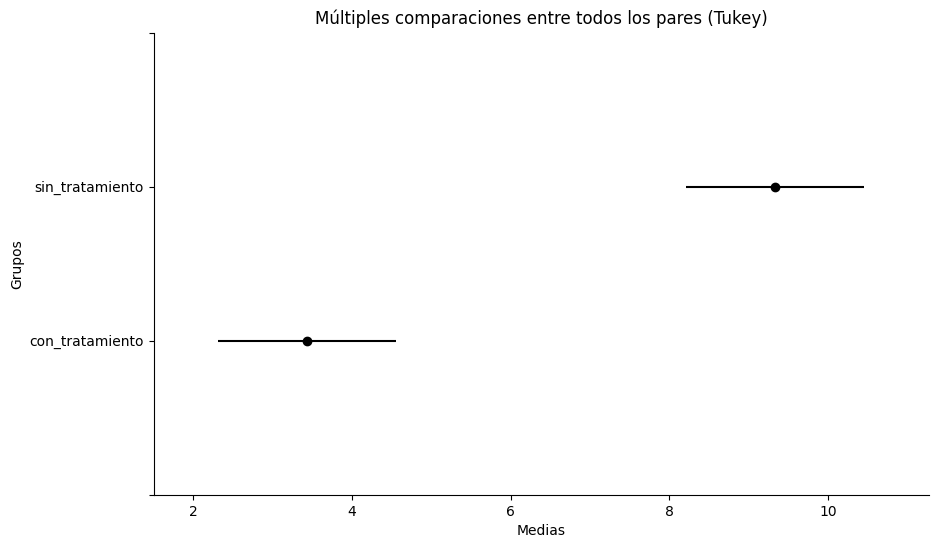

In [59]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['%'], groups=df['tratamiento'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Medias")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
# BRIAN ALEXIS VILLALOBOS DE LOERA

# Conclusión:
El tipo de aglutinante afecta mucho la friabilidad de las tabletas. La CMC produjo tabletas más frágiles que las hechas con PVP o grenetina.

# Recomendación:
Evitar el uso de CMC si se quieren tabletas más resistentes. Se recomienda seguir probando otros aglutinantes que puedan mejorar la calidad del producto.